In [24]:
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from skimage.filters import threshold_yen
from skimage.morphology import watershed
from skimage.feature import peak_local_max
im = ndi.imread('test_image.tif')

# Binarization

Finding an appropriate threshold T to get a transformed image such that only pixel with intensity > T take the value 1, the other taking the value 0

In [9]:
thresh = threshold_yen(im)
binary = im > thresh

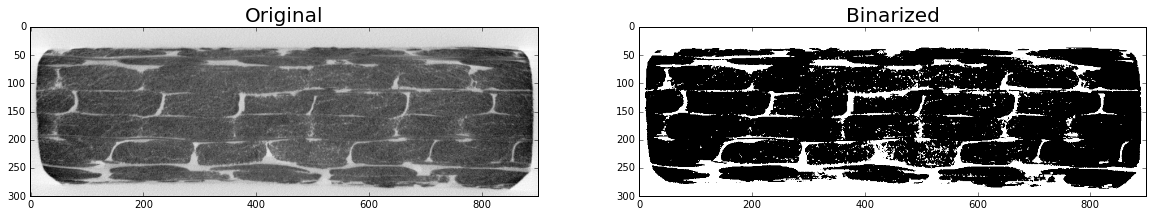

In [10]:
%matplotlib inline
f , (ax1,ax2) = plt.subplots(1,2,figsize=(20,20))
ax1.set_title('Original',size=20)
ax1.imshow(im,cmap='Greys')
ax2.set_title('Binarized',size=20)
ax2.imshow(binary,cmap='Greys')

# Distance transformation

Transformation of the binary image to an image called distance.

$distance(i,j)$ is the distance of $binary(i,j)$ to the nearest zero-value pixel of the binary image.

It helps differentiating the centers from the edges of black spots

In [11]:
distance = ndi.distance_transform_edt(binary)

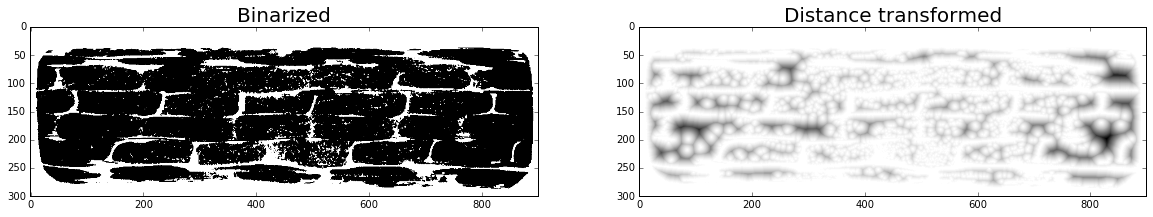

In [12]:
f , (ax1,ax2) = plt.subplots(1,2,figsize=(20,20))
ax1.set_title('Binarized',size=20)
ax1.imshow(binary,cmap='Greys')
ax2.set_title('Distance transformed',size=20)
ax2.imshow(distance,cmap='Greys')

# Finding local maximas

To initiate the watershed segmentation, we need to provide points from where to start the flooding. We can find them by using the local maximas of the distance transformed map.

The footprint argument representes a rectangle in which to look for local maximas. (40,110) is an approximation of the size of the fibers we want to detect

In [13]:
maxima = peak_local_max(distance,indices=False,footprint=np.ones((40,110)),labels=binary)

Showing the maximas of the distance image on top of the Binarized image

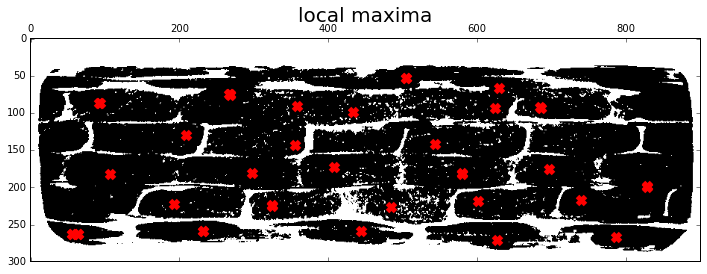

In [14]:
plt.figure(1,figsize=(12,12))
plt.title('local maxima',size=20)
plt.imshow(binary,cmap='Greys')
plt.spy(maxima,marker='x',markersize=8,markeredgewidth=5,color='r')

# Watershed segmentation

Using the watershed function from skimage to do the segmentation.

We start the flooding from the local maximas above. We use the watershed algorithm on -distance to havec basins on the location of the maximas above instead of hills

In [17]:
markers = ndi.label(maxima)[0]
labels = watershed(-distance, markers, mask=binary)

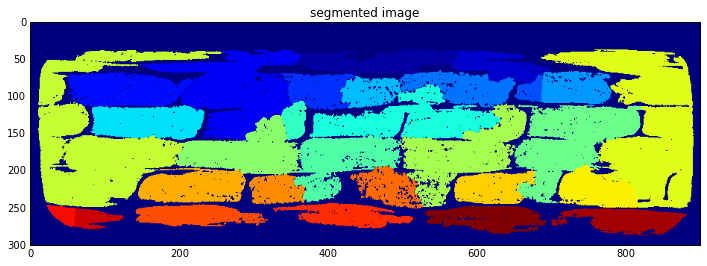

In [56]:
plt.figure(1,figsize=(12,12))
plt.title('segmented image')
plt.imshow(labels)

# Parameters dependence

Function wrapping up the procedure. Parameters are m, a multiplicative rate of the threshold used to binarize the image (threshold initialy found with the threshold_yen function) and footprint which is a double (width,height) indicating the size of the rectangle used to search for maximas

In [35]:
def watershed_func(m,footprint=(40,110)):
    thresh = threshold_yen(im)
    binary = im > thresh*m
    
    distance = ndi.distance_transform_edt(binary)
    maxima = peak_local_max(distance,indices=False,footprint=np.ones(footprint),labels=binary)
    
    markers = ndi.label(maxima)[0]
    labels = watershed(-distance, markers,mask=binary)
    
    f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20))
    ax1.set_title('Segmented image',size=25)
    ax1.imshow(labels)
    ax2.set_title('Binary with maximas',size=25)
    ax2.imshow(binary,cmap='Greys')
    ax2.spy(maxima,marker='x',markersize=8,markeredgewidth=5,color='r')

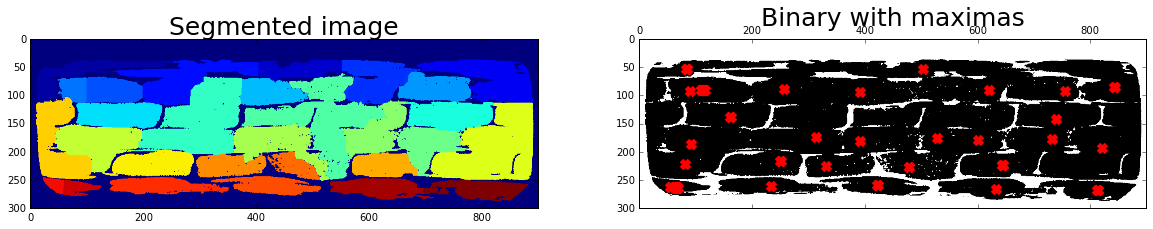

In [39]:
watershed_func(0.95)